In [1]:
import pandas as pd 
import os 
import glob
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# get data file names
# path ="/media/rahman/programming/Machine_Learning/business_data_science_project/Sales_Data"
# filenames = glob.glob(path + "/*.csv")

# dfs = []
# for filename in filenames:
#     dfs.append(pd.read_csv(filename))
# dfs

# marge all csv file

In [3]:
path ="/media/rahman/programming/Machine_Learning/business_data_science_project/Sales_Data"
file=glob.glob(path+"/*.csv")
list=[]

for f in file:
    temp_df=pd.read_csv(f)
    list.append(temp_df)
df = pd.concat(list, axis=0)
df.to_csv("marge_data.csv")

In [4]:
all_data=pd.read_csv("marge_data.csv")
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# Clean up the data

###Drop row nan

In [5]:
nan_values = all_data[all_data.isna().any(axis=1)]
nan_values.head()
all_data=all_data.dropna(how='any')
all_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...
186845,12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
186846,12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
186847,12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
186848,12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


# Agument data with additional column

###Task2:Add month column 

In [6]:
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data['Month'] = pd.to_numeric(all_data['Month'], errors='coerce')
print(all_data.dtypes)
# all_data['Month'] =pd.to_numeric(all_data, downcast='integer', errors='coerce')
# all_data.head(60)
# del all_data["date"]
# all_data["Month"]

Unnamed: 0            int64
Order ID             object
Product              object
Quantity Ordered     object
Price Each           object
Order Date           object
Purchase Address     object
Month               float64
dtype: object


# convert data type 

In [7]:
# all_data["Quantity Ordered"]=pd.to_numeric(all_data, downcast='integer')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
print(all_data.dtypes)

Unnamed: 0            int64
Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month               float64
dtype: object


# Add month column 

In [8]:
all_data["Sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]
all_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1.0,700.00
1,1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1.0,14.95
2,2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1.0,23.98
3,3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1.0,149.99
4,4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1.0,11.99
...,...,...,...,...,...,...,...,...,...
186845,12006,248146,Bose SoundSport Headphones,1.0,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",8.0,99.99
186846,12007,248147,AAA Batteries (4-pack),3.0,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8.0,8.97
186847,12008,248148,AA Batteries (4-pack),1.0,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",8.0,3.84
186848,12009,248149,USB-C Charging Cable,1.0,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",8.0,11.95


# Add city column 

In [9]:
def get_city():
    all_data["City"]=all_data["Purchase Address"].apply(lambda x: x.split(',')[1:2])
    all_data["City"]=all_data["City"].str[0]
    return all_data
get_city()
# def get_state():
#     all_data["City"]=all_data["Purchase Address"].apply(lambda x: x.split(',')[2:3])
#     all_data["City"]=all_data["City"].str[0]

# def marge_city():
#     return get_city() , get_state()
# marge_city()


# all_data["City"]=all_data["Purchase Address"].apply(lambda x: x.split(',')[1:2])
# all_data["City"]=all_data["City"].str[0]

all_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1.0,700.00,Boston
1,1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1.0,14.95,Portland
2,2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1.0,23.98,San Francisco
3,3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1.0,149.99,Los Angeles
4,4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1.0,11.99,Austin
...,...,...,...,...,...,...,...,...,...,...
186845,12006,248146,Bose SoundSport Headphones,1.0,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",8.0,99.99,San Francisco
186846,12007,248147,AAA Batteries (4-pack),3.0,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8.0,8.97,Boston
186847,12008,248148,AA Batteries (4-pack),1.0,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",8.0,3.84,Seattle
186848,12009,248149,USB-C Charging Cable,1.0,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",8.0,11.95,San Francisco


In [10]:
all_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1.0,700.00,Boston
1,1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1.0,14.95,Portland
2,2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1.0,23.98,San Francisco
3,3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1.0,149.99,Los Angeles
4,4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1.0,11.99,Austin
...,...,...,...,...,...,...,...,...,...,...
186845,12006,248146,Bose SoundSport Headphones,1.0,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",8.0,99.99,San Francisco
186846,12007,248147,AAA Batteries (4-pack),3.0,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8.0,8.97,Boston
186847,12008,248148,AA Batteries (4-pack),1.0,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",8.0,3.84,Seattle
186848,12009,248149,USB-C Charging Cable,1.0,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",8.0,11.95,San Francisco


In [11]:
# all_data['City'].astype(str)
# all_data['Sales'].astype(int)
# pd.to_numeric(all_data['Sales'], errors='coerce')
print(all_data.dtypes)

Unnamed: 0            int64
Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month               float64
Sales               float64
City                 object
dtype: object


### what was the best mounth for sale?How mauch was earned this mounth ?

In [12]:
result=all_data.groupby("Month").sum()
result

,Unnamed: 0,Quantity Ordered,Price Each,Sales
Month,,,,
1.0,47433245,10903.0,1.811768e+06,1.822257e+06
2.0,72123197,13449.0,2.188885e+06,2.202022e+06
3.0,115333587,17005.0,2.791208e+06,2.807100e+06
4.0,167977608,20558.0,3.367671e+06,3.390670e+06
5.0,137829259,18667.0,3.135125e+06,3.152607e+06
6.0,92330356,15253.0,2.562026e+06,2.577802e+06
7.0,102752005,16072.0,2.632540e+06,2.647776e+06
8.0,71824951,13448.0,2.230345e+06,2.244468e+06
9.0,67863032,13109.0,2.084992e+06,2.097560e+06


In [13]:
all_data.to_csv("sale.csv")

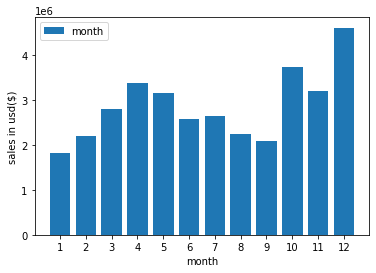

In [14]:
month=range(1,13)
plt.bar(month,result["Sales"])
plt.xticks(month)
plt.xlabel("month")
plt.ylabel("sales in usd($)")
plt.legend(labels=['month'])
plt.show()

# What city the highest number of sales ?

In [15]:
result=all_data.groupby("City").sum()
result

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta,122928154,16602.0,2.779908e+06,104794.0,2.795499e+06
Austin,82709457,11153.0,1.809874e+06,69829.0,1.819582e+06
Boston,165758780,22528.0,3.637410e+06,141112.0,3.661642e+06
Dallas,124308328,16730.0,2.752628e+06,104620.0,2.767975e+06
Los Angeles,247743297,33289.0,5.421435e+06,208325.0,5.452571e+06
New York City,208439450,27932.0,4.635371e+06,175741.0,4.664317e+06
Portland,104043698,14053.0,2.307747e+06,87765.0,2.320491e+06
San Francisco,372569180,50239.0,8.211462e+06,315520.0,8.262204e+06
Seattle,122394893,16553.0,2.733296e+06,104941.0,2.747755e+06


# Creat new file 

In [16]:
result.to_csv("City_column.csv")

In [17]:
df=pd.read_csv("City_column.csv")
df['Sales'].astype(int)

0    2795498
1    1819581
2    3661642
3    2767975
4    5452570
5    4664317
6    2320490
7    8262203
8    2747755
Name: Sales, dtype: int64

In [18]:
cities=df["City"].unique()
# sales=all_data["Sales"].unique()
print(cities)
# print(sales)

[' Atlanta' ' Austin' ' Boston' ' Dallas' ' Los Angeles' ' New York City'
 ' Portland' ' San Francisco' ' Seattle']


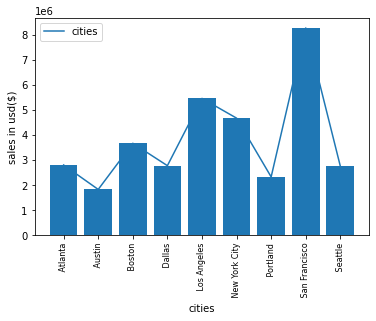

In [19]:
# plt.bar(cities,all_data["Sales"])
plt.errorbar(cities,df['Sales'])
plt.bar(cities,df['Sales'])
plt.xticks(cities,rotation="vertical",size=8)
plt.xlabel("cities")
plt.ylabel("sales in usd($)")
plt.legend(labels=['cities'])

# What time should we display advertisements to maxmize likelihood of customer's buying product ?

In [20]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1.0,700.00,Boston
1,1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1.0,14.95,Portland
2,2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1.0,23.98,San Francisco
3,3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1.0,149.99,Los Angeles
4,4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1.0,11.99,Austin


In [ ]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"],errors='coerce')
all_data["Hour"] =all_data["Order Date"].dt.month
all_data["Minute"] =all_data["Order Date"].dt.minute
all_data.to_csv("Change_dtype.csv")
# df.Date_time.dt.month.head()
all_data

In [ ]:
df=pd.read_csv("Change_dtype.csv")
df

In [ ]:
# df["Hour"].astype(int)
print(all_data.dtypes)

In [ ]:
hours=[hour for hour ,df in all_data .groupby("Hour")]
hours
result=all_data.groupby("Hour").sum()

In [ ]:
plt.plot(hours,all_data.groupby(["Hour"]).count())
plt.grid()
plt.xticks(hours)
plt.show


# What products are most often sold together?

In [ ]:
df=all_data[all_data["Order ID"].duplicated(keep = False)]
df

In [ ]:
df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))
df

In [ ]:
df=df[["Order ID","Grouped"]].drop_duplicates()
df.head(20)

In [ ]:
from itertools import combinations
from collections import Counter  
# letters ="GeEKS"
# a = combinations(letters, 3) 
# # lists=[]
# # for list in a:
# #     lists.append(list)
# # print(lists)


# y = [' '.join(x) for x in a]
# print(y)

count=Counter()
for row in df["Grouped"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list, 2)))
for key,value in count.most_common(10):
    print(key,value)

# What product sold the most ? why do you think it sold the most ?

In [ ]:
all_data.head()

In [ ]:
product_group=all_data.groupby("Product")
Quantity_Ordered=product_group.sum()["Quantity Ordered"]
Quantity_Ordered

In [ ]:
product=[Product for Product ,df in product_group]
product

In [ ]:
plt.bar(product,Quantity_Ordered)
plt.xticks(product,rotation="vertical",size=8)
plt.xlabel("product")
plt.ylabel("Quantity Ordered")
plt.show()

In [ ]:
prices=all_data.groupby("Product").mean()["Price Each"]
prices

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()